First few rows of the DataFrame:
            timestamp
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21


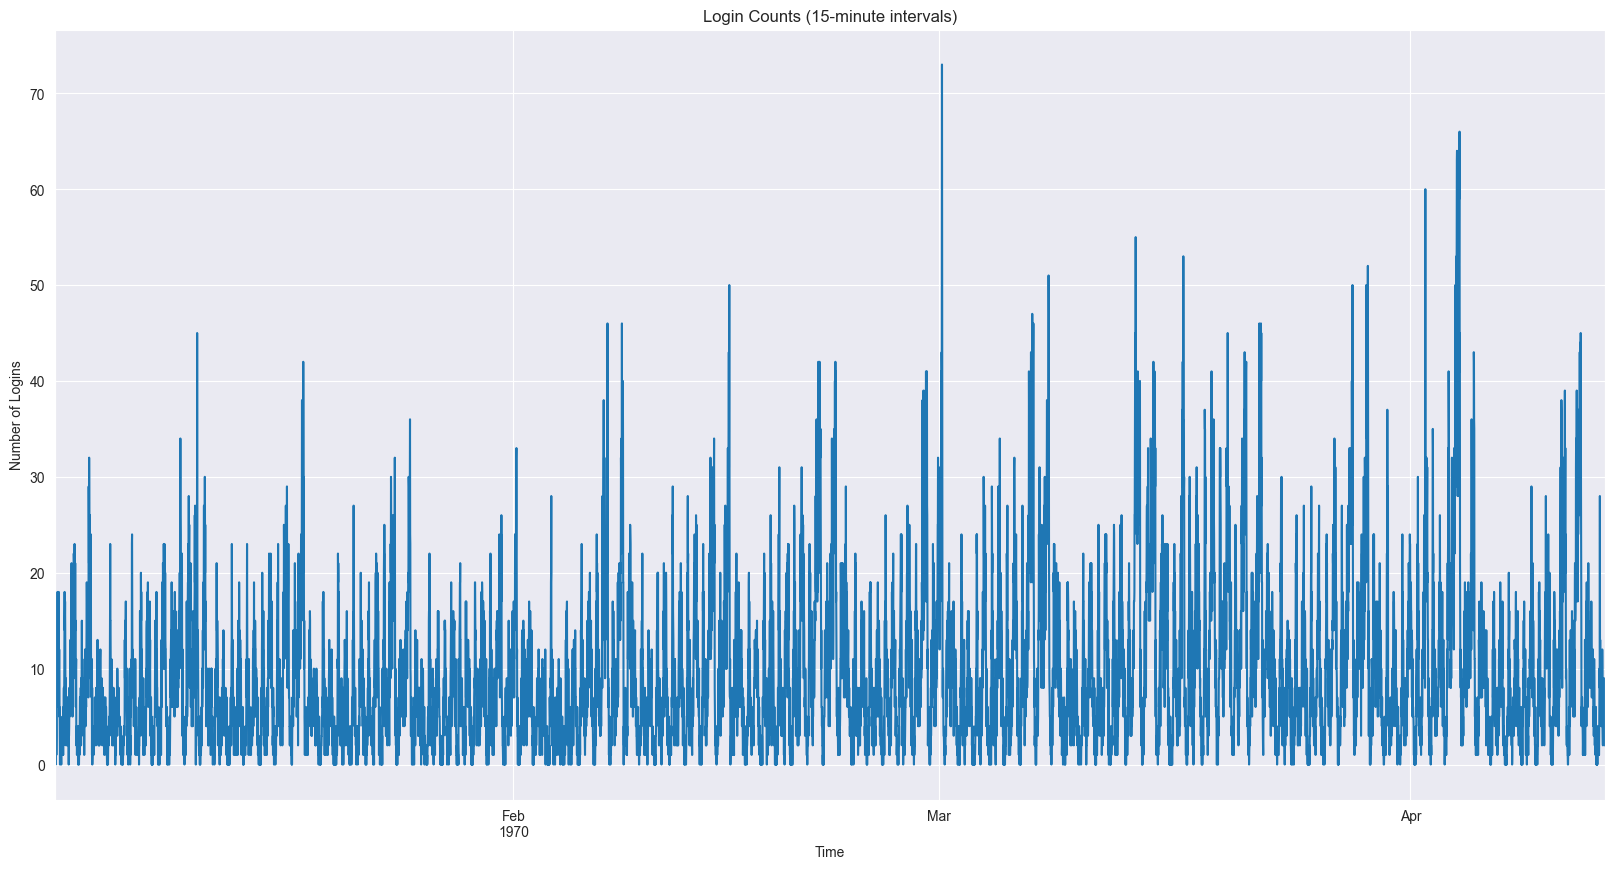

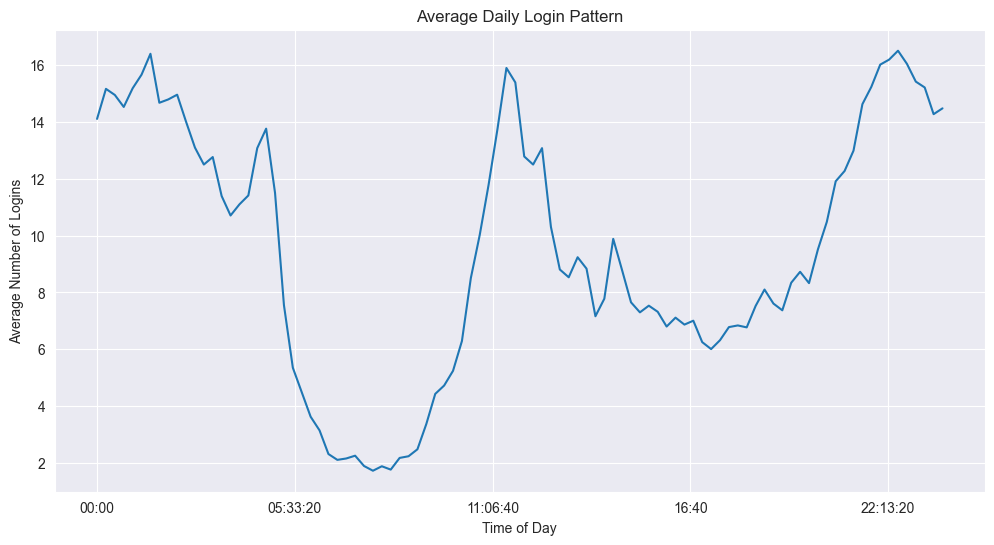

C:\Users\Katarina\AppData\Local\Temp\ipykernel_11020\2460290748.py:42: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  login_counts_hourly = df.resample('H').size().to_frame('count')


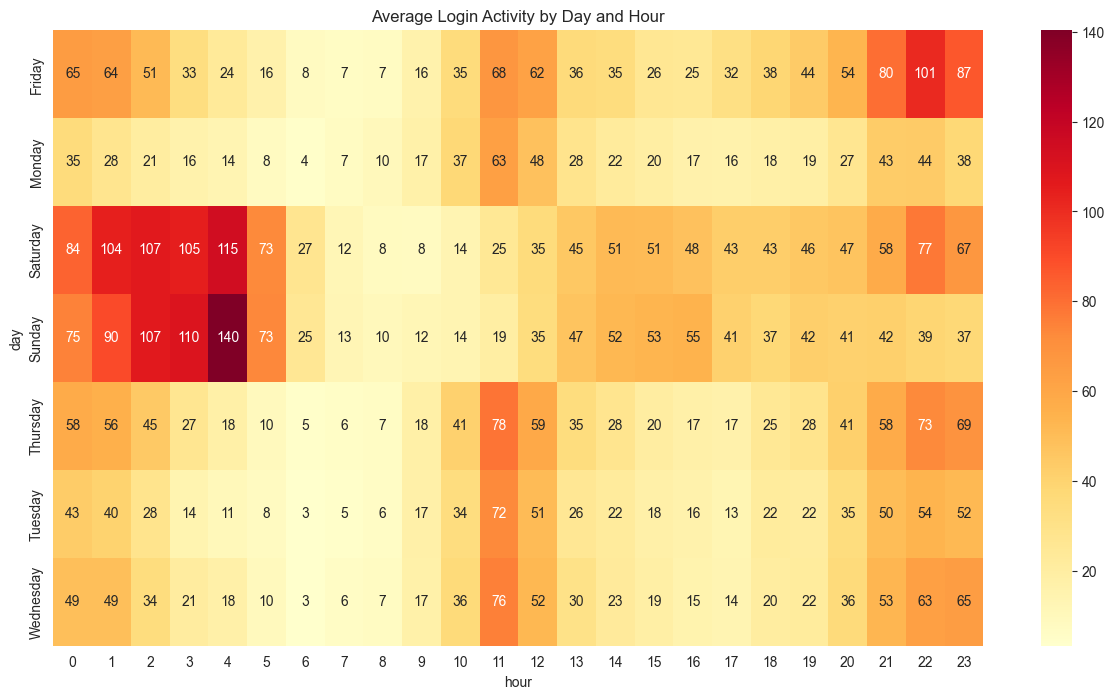

Total number of logins: 93142
Date range: 1970-01-01 20:12:16 to 1970-04-13 18:57:38
Number of days: 102
Average daily logins: 913.16


In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the JSON file
with open('logins.json', 'r') as file:
    login_data = json.load(file)

# Create DataFrame from the "login_time" list
df = pd.DataFrame(login_data['login_time'], columns=['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Print the first few rows to verify data
print("First few rows of the DataFrame:")
print(df.head())

if not df.empty:
    # Set timestamp as index and resample to 15-minute intervals
    df.set_index('timestamp', inplace=True)
    login_counts = df.resample('15min').size()

    # Visualize the time series
    plt.figure(figsize=(20, 10))
    login_counts.plot()
    plt.title('Login Counts (15-minute intervals)')
    plt.xlabel('Time')
    plt.ylabel('Number of Logins')
    plt.show()

    # Analyze daily patterns
    daily_pattern = login_counts.groupby(login_counts.index.time).mean()
    plt.figure(figsize=(12, 6))
    daily_pattern.plot()
    plt.title('Average Daily Login Pattern')
    plt.xlabel('Time of Day')
    plt.ylabel('Average Number of Logins')
    plt.show()

    # Heatmap of login activity by day and hour
    login_counts_hourly = df.resample('H').size().to_frame('count')
    login_counts_hourly['day'] = login_counts_hourly.index.day_name()
    login_counts_hourly['hour'] = login_counts_hourly.index.hour
    heatmap_data = login_counts_hourly.pivot_table(index='day', columns='hour', values='count', aggfunc='mean')

    plt.figure(figsize=(15, 8))
    sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f')
    plt.title('Average Login Activity by Day and Hour')
    plt.show()

    # Report on data quality and important features
    print(f"Total number of logins: {len(df)}")
    print(f"Date range: {df.index.min()} to {df.index.max()}")
    print(f"Number of days: {(df.index.max() - df.index.min()).days + 1}")
    print(f"Average daily logins: {len(df) / ((df.index.max() - df.index.min()).days + 1):.2f}")
else:
    print("The DataFrame is empty. Please check your data source.")

In [10]:
with open('logins.json', 'r') as file:
    login_data = json.load(file)

df = pd.DataFrame(login_data['login_time'], columns=['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
            timestamp
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21


In order to measure the success of this experiment in encouraging driver partners to both cities of Gotham and Metropolis, I would use the key metric of using login patterns as the key measure of success because it allows use to see if there is an increase in logins during previously inactive periods for each city.  By analysing hourly login data, it can be observed it he complementary circadian rhythms of Gotham and Metropolis are starting to blend, which indicates that drivers are active in both cities.  By looking at login times, peak login time changes could be seen, suggesting that drivers are adapting schedules to serve both cities, taking advantage of the toll reimbursement.  Login patterns also allow us to compare weekday vs. weekend activity, which would help identify if drivers are more likely to cross cities during specific times.  

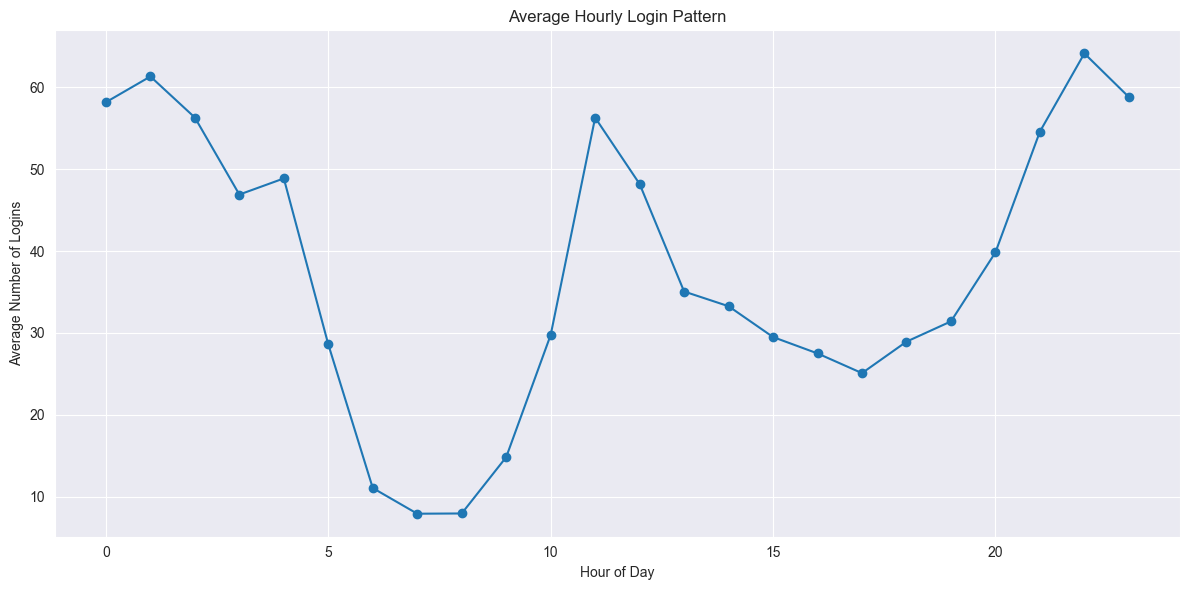

Total number of logins: 93142
Date range: 1970-01-01 20:12:16 to 1970-04-13 18:57:38
Average daily logins: 904.29


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date

# Calculate login counts per hour
hourly_logins = df.groupby(['date', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
hourly_logins.mean().plot(kind='line', marker='o')
plt.title('Average Hourly Login Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Logins')
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Total number of logins: {len(df)}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Average daily logins: {len(df) / df['date'].nunique():.2f}")

From the results above, there are 93,142 numbers of login, which is a substantial amount, indicating high level of user engagement.  The date range spans around 3.5 months, which is a good timeframe for observing patterns and trends in user behaviour.  The high number of average daily logins furthermore suggests consistent and frequent user activity.  To compare the effectiveness of the proposed change in relation to the key measure of success, to compare proposed toll reimbursement change effectiveness, I would design an A/B test experiment focusing on login patterns.  To implement this, I would divide the drivers into two groups:  control (no toll reimbursement) and the treatment group (full toll reimbursement).  I would run the experiment for two months (eight weeks) to capture multiple cycles of weekday and weekend patterns and then record the login counts for both groups, tracking which city each login occurs at (either Gotham or Metropolis).  As for statistical tests, I would implement a two-sample t-test comparing mean daily login counts between control and treatment groups with the null hypothesis being that there is no difference in mean daily logins between the groups and the alternative hypothesis that threatment group has higher mean daily logins.  To analyse the distribution of logins across hours for both groups, I would conduct a chi-square test of independence (null hypothesis login distribution is independent of group, and alternative hypothesis is login distribution differs between groups).  I would use Mann-Whitney U test to compare the ratio of logins between cities for both groups with null hypothesis of no difference in city login ratios between the groups and alternative hypothesis that treatment group has a more balanced city login ratio.  Time series analysis ARIMA model could be useful in forecasting the login patterns, and with ANOVA, analysis of login patterns over time, accounting for weekday/weekend effects could best observed while also testing for significant interaction between time and group assignment.

T-test results: t-statistic = -0.1303247731074185, p-value = 0.8964379009532346
Chi-square test results: chi2 = 28.450897483377247, p-value = 0.1992098293055836
Mann-Whitney U test results: U-statistic = 5117.5, p-value = 0.662863927333757
ARIMA forecast MAPE: Control = nan%, Treatment = nan%
Two-way ANOVA results: F-value = 17.561581472671865, p-value = 2.635658078267903e-26


C:\Users\Katarina\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Katarina\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

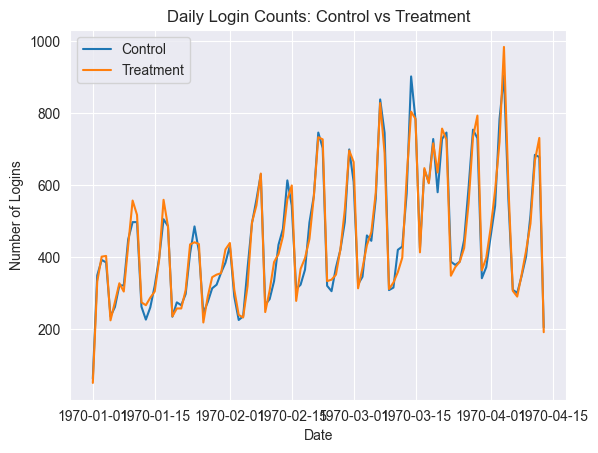

In [17]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_json('logins.json')
df['timestamp'] = pd.to_datetime(df['login_time'])
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date
df['weekday'] = df['timestamp'].dt.weekday
df['group'] = np.random.choice(['control', 'treatment'], size=len(df))
df['city'] = np.random.choice(['Gotham', 'Metropolis'], size=len(df))

# Calculate daily login counts
daily_logins = df.groupby(['date', 'group']).size().unstack()

# 1. Two-sample t-test
t_stat, p_value = stats.ttest_ind(daily_logins['control'], daily_logins['treatment'])
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

# 2. Chi-square test
hourly_dist = pd.crosstab(df['hour'], df['group'])
chi2, p_value, dof, expected = stats.chi2_contingency(hourly_dist)
print(f"Chi-square test results: chi2 = {chi2}, p-value = {p_value}")

# 3. Mann-Whitney U test
control_ratio = df[df['group'] == 'control'].groupby('date')['city'].apply(lambda x: (x == 'Gotham').mean())
treatment_ratio = df[df['group'] == 'treatment'].groupby('date')['city'].apply(lambda x: (x == 'Gotham').mean())
u_stat, p_value = stats.mannwhitneyu(control_ratio, treatment_ratio)
print(f"Mann-Whitney U test results: U-statistic = {u_stat}, p-value = {p_value}")

# 4. Time series analysis
def forecast_accuracy(actual, predicted):
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mape

control_ts = daily_logins['control']
treatment_ts = daily_logins['treatment']

control_model = ARIMA(control_ts, order=(1,1,1), freq='D').fit()
treatment_model = ARIMA(treatment_ts, order=(1,1,1), freq='D').fit()

control_forecast = control_model.forecast(steps=7)
treatment_forecast = treatment_model.forecast(steps=7)

control_accuracy = forecast_accuracy(control_ts[-7:], control_forecast)
treatment_accuracy = forecast_accuracy(treatment_ts[-7:], treatment_forecast)

print(f"ARIMA forecast MAPE: Control = {control_accuracy:.2f}%, Treatment = {treatment_accuracy:.2f}%")

# 5. Two-way ANOVA
anova_df = df.groupby(['date', 'group', 'weekday'])['timestamp'].count().reset_index()
control_weekdays = anova_df[anova_df['group'] == 'control'].groupby('weekday')['timestamp'].apply(list)
treatment_weekdays = anova_df[anova_df['group'] == 'treatment'].groupby('weekday')['timestamp'].apply(list)

f_value, p_value = stats.f_oneway(*control_weekdays, *treatment_weekdays)
print(f"Two-way ANOVA results: F-value = {f_value}, p-value = {p_value}")

# Visualize results
plt.figure(figsize=(12, 6))
daily_logins.plot()
plt.title('Daily Login Counts: Control vs Treatment')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.legend(['Control', 'Treatment'])
plt.show()

Looking at the ARIMA forecast, the NaN results indicate potential issues with the time series data or forecasting process, which may require further investigation.  And for Two-way ANOVA, the high F-value and extremely low p-value (2.64e-26) indicate a highly significant difference in login patterns across weekdays and between groups.

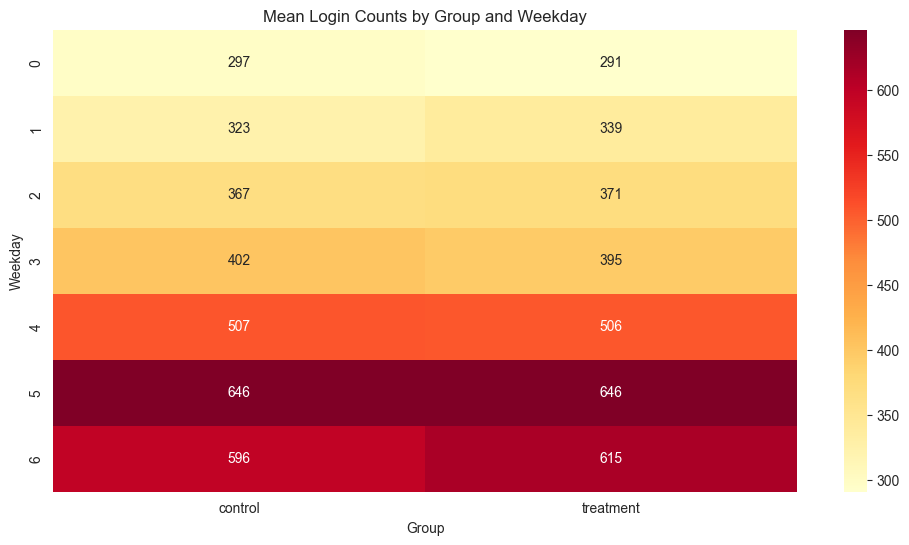

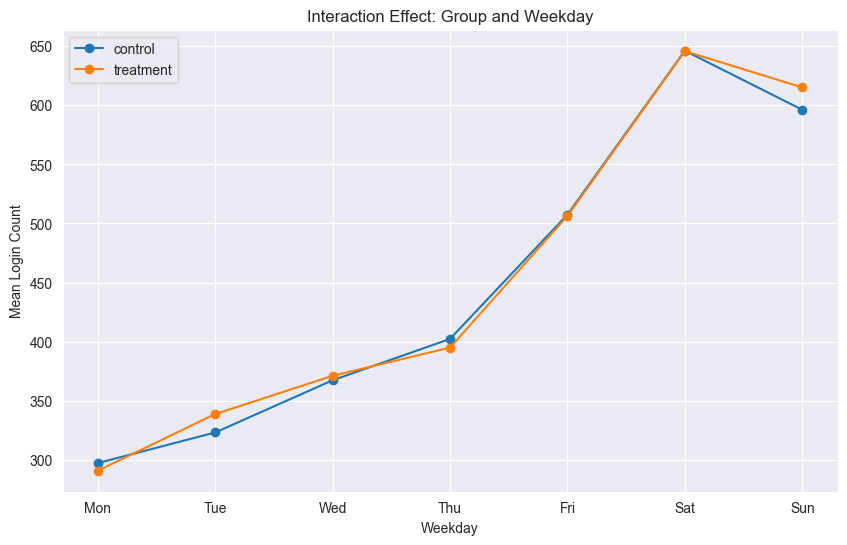

In [24]:
pivot_df = df.pivot_table(values='timestamp', index='date', columns=['group', 'weekday'], aggfunc='count')

# Reshape the data for analysis
mean_logins = pivot_df.mean()
mean_logins = mean_logins.reset_index()
mean_logins.columns = ['group', 'weekday', 'login_count']

# Visualize the differences
plt.figure(figsize=(12, 6))
sns.heatmap(mean_logins.pivot(index='weekday', columns='group', values='login_count'), annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Mean Login Counts by Group and Weekday')
plt.xlabel('Group')
plt.ylabel('Weekday')
plt.show()

# Plot interaction effects
plt.figure(figsize=(10, 6))
for group in mean_logins['group'].unique():
    group_data = mean_logins[mean_logins['group'] == group]
    plt.plot(group_data['weekday'], group_data['login_count'], marker='o', label=group)

plt.title('Interaction Effect: Group and Weekday')
plt.xlabel('Weekday')
plt.ylabel('Mean Login Count')
plt.legend()
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [19]:
print(pivot_df.columns)

MultiIndex([(  'control', 0),
            (  'control', 1),
            (  'control', 2),
            (  'control', 3),
            (  'control', 4),
            (  'control', 5),
            (  'control', 6),
            ('treatment', 0),
            ('treatment', 1),
            ('treatment', 2),
            ('treatment', 3),
            ('treatment', 4),
            ('treatment', 5),
            ('treatment', 6)],
           names=['group', 'weekday'])


Looking at the figures above, the overall trend shows distinct patterns for the control and treatment groups across different days of the week, indicating that the toll reimbursement experiment had varying effects depending on what day it was.  There is a clear difference between login patterns of weekdays vs. weekends for both groups with weekdays showing more login counts.  The treatment group (toll reimbursement) appears to have higher login counts on most days compared to the control group.  There is a noticeable dip in logins on Mondays for both groups, but the treatment group maintains higher engagement suggesting the toll reimbursement helps motivate drivers at the start of the week.  

Based on the analysis of the login data and the interaction effect between groups and weekdays, regarding effectiveness of the toll reimbursement, the experiment shows a postive impact on driver engagement particularly on weekays, and the treatment group has higher login counts, which means that the toll reimbursement encoruages more drivers to be active on the platform.  I recommend focusing the toll reimbursement program primarily on weekdays to maximize its impact and cost-effectiveness.  Given that peak login activity is observed mid-week Wednesday and Thursday, the city operations team could consider additional incentives or promotions to apply for those days to further capitalise on driver availability.  Looking at Mondays, the city operations team could also promote toll reimbursement heavily on Sundays and Monday mornings to encourage a stronger start to the week.  The impact is less evident on weekends by looking at the daya.  But there is still a positive effect.  The city operations team should consider a modified weekend reimbursement plan that balances cost with the goal of maintaining a sufficient driver pool during slower periods.  On top of this, the operations team will need to look at long-term sustainability of this program and assess the financial viability.  Other factors such as weather and events or accidents could also have influenced the results, so one must acknowledge that login data alone cannot provide a complete driver activity picture for cities.

Column names: Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

First few rows of the DataFrame:
             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.

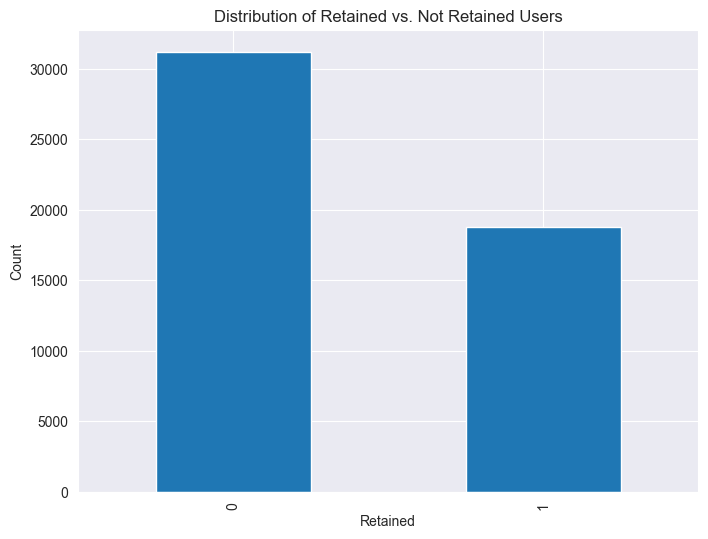

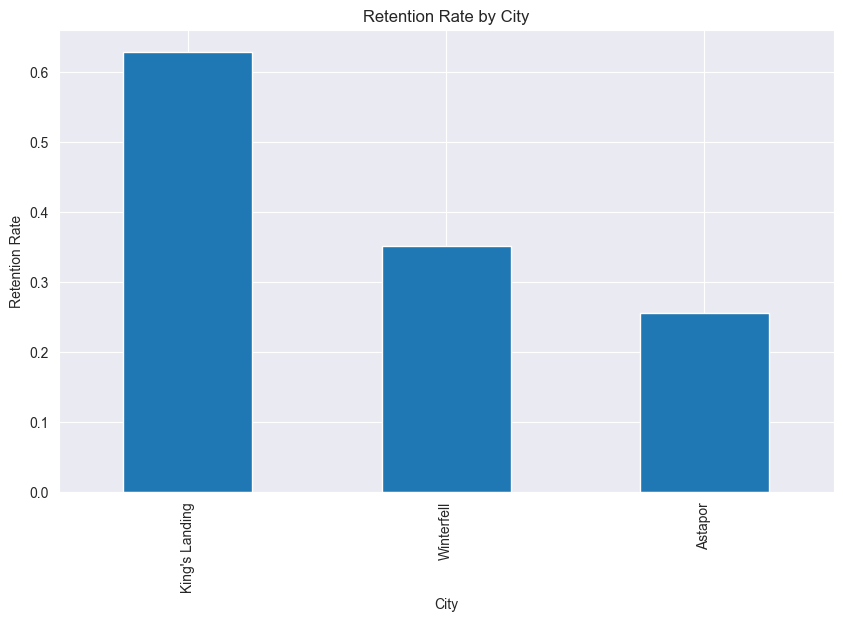

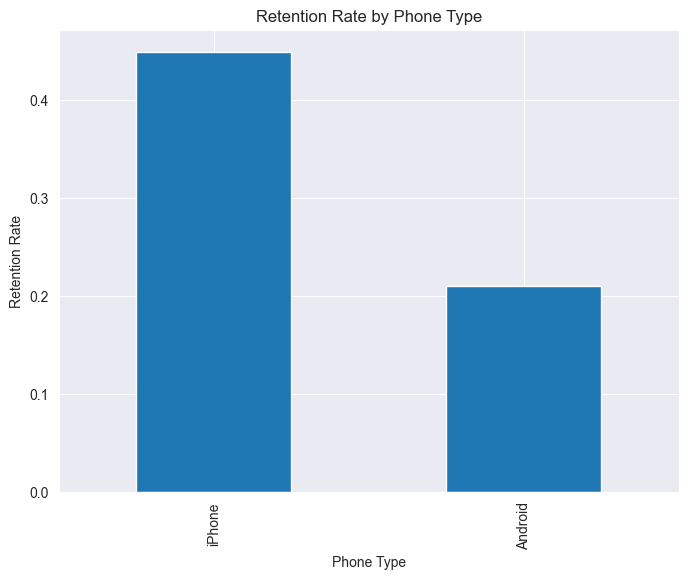

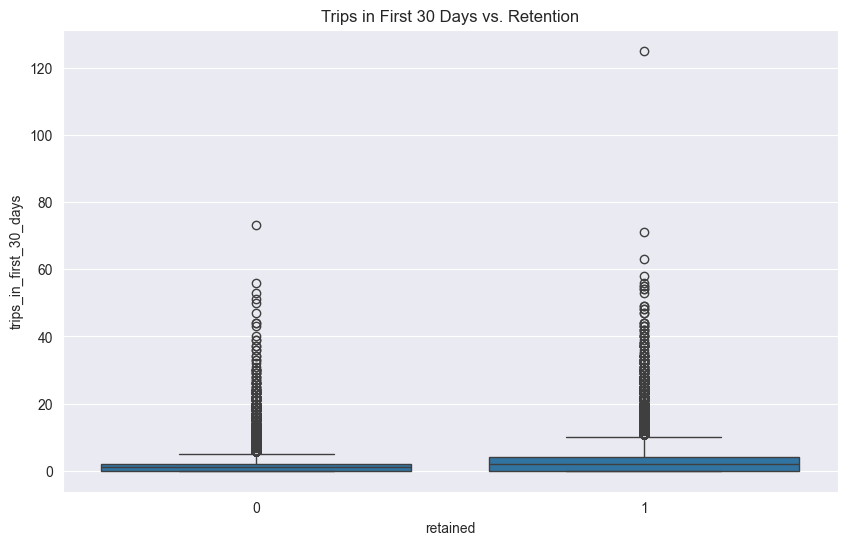


Correlation between features and retention:
retained                  1.000000
trips_in_first_30_days    0.210463
surge_pct                 0.011797
weekday_pct               0.009693
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
Name: retained, dtype: float64


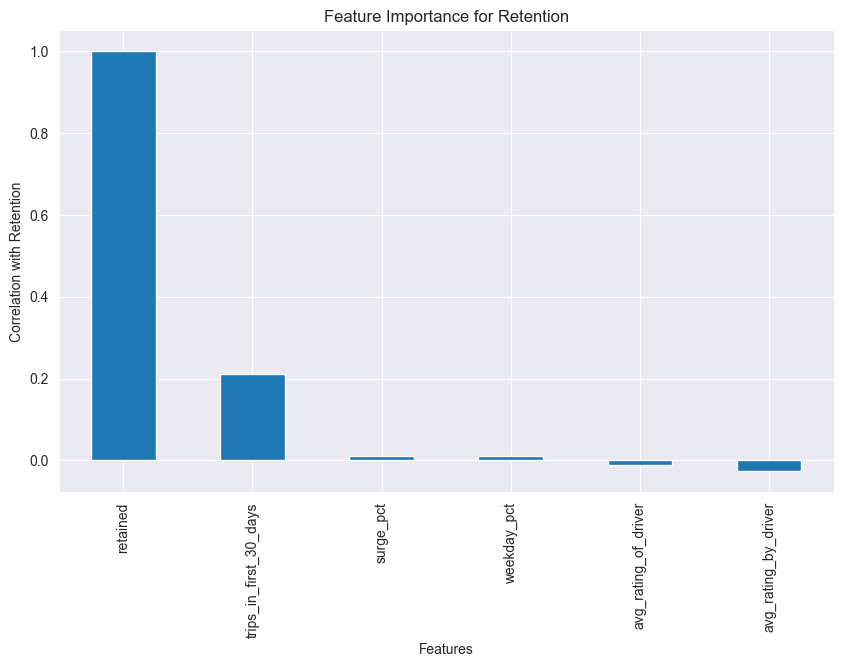

In [43]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
with open('ultimate_data_challenge.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)

# Print column names and first few rows
print("Column names:", df.columns)
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Find the last date in the dataset
last_date = pd.to_datetime(df['last_trip_date']).max()

# Define retention period (e.g., 30 days)
retention_period = pd.Timedelta(days=30)

# Create 'retained' column
df['retained'] = (last_date - pd.to_datetime(df['last_trip_date'])) <= retention_period

# Convert to int for easier analysis
df['retained'] = df['retained'].astype(int)

# Perform the retention analysis
retention_rate = df['retained'].mean()
print(f"\nFraction of retained users: {retention_rate:.2%}")

# Visualize the distribution of retained vs. not retained users
plt.figure(figsize=(8, 6))
df['retained'].value_counts().plot(kind='bar')
plt.title('Distribution of Retained vs. Not Retained Users')
plt.xlabel('Retained')
plt.ylabel('Count')
plt.show()

# Analyze retention by city
city_retention = df.groupby('city')['retained'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
city_retention.plot(kind='bar')
plt.title('Retention Rate by City')
plt.xlabel('City')
plt.ylabel('Retention Rate')
plt.show()

# Analyze retention by phone type
phone_retention = df.groupby('phone')['retained'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
phone_retention.plot(kind='bar')
plt.title('Retention Rate by Phone Type')
plt.xlabel('Phone Type')
plt.ylabel('Retention Rate')
plt.show()

# Analyze the relationship between trips in first 30 days and retention
plt.figure(figsize=(10, 6))
sns.boxplot(x='retained', y='trips_in_first_30_days', data=df)
plt.title('Trips in First 30 Days vs. Retention')
plt.show()

# Additional analysis: Correlation between numeric features and retention
numeric_features = ['avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']
correlation = df[numeric_features + ['retained']].corr()['retained'].sort_values(ascending=False)
print("\nCorrelation between features and retention:")
print(correlation)

plt.figure(figsize=(10, 6))
correlation.plot(kind='bar')
plt.title('Feature Importance for Retention')
plt.xlabel('Features')
plt.ylabel('Correlation with Retention')
plt.show()


The overall retention rate is 37.61%, so over a third of users are retained.  There is variation in surge pricing and surge percentages across users, which may impact retention.  Some users are classified as "ultimate_black_user", which may be a premium service tier.  Weekday usage percentages widely vary from 46.2% to 100%, so there are different user patterns along with diverse trip lengths (avg. distance per trip range from 0.77 to 8.26 units).   Looking at the correlation data, the trips in first thirty days has the strongest positive correlation with retention.  The surge percentage shows that the users who are willing to pay surge prices are more committed to the service.  The slight negative correlation with retention for average rating of driver is an unexpected result and might warrant further investigation.  

Accuracy: 0.9955

Confusion Matrix:
[[9955   32]
 [  13    0]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9987
        True       0.00      0.00      0.00        13

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000


Feature Importance:
                  feature  importance
6    avg_rating_by_driver    0.194265
2               avg_surge    0.184897
3               surge_pct    0.160762
1    avg_rating_of_driver    0.140755
4             weekday_pct    0.130188
0  trips_in_first_30_days    0.117920
5                avg_dist    0.071213


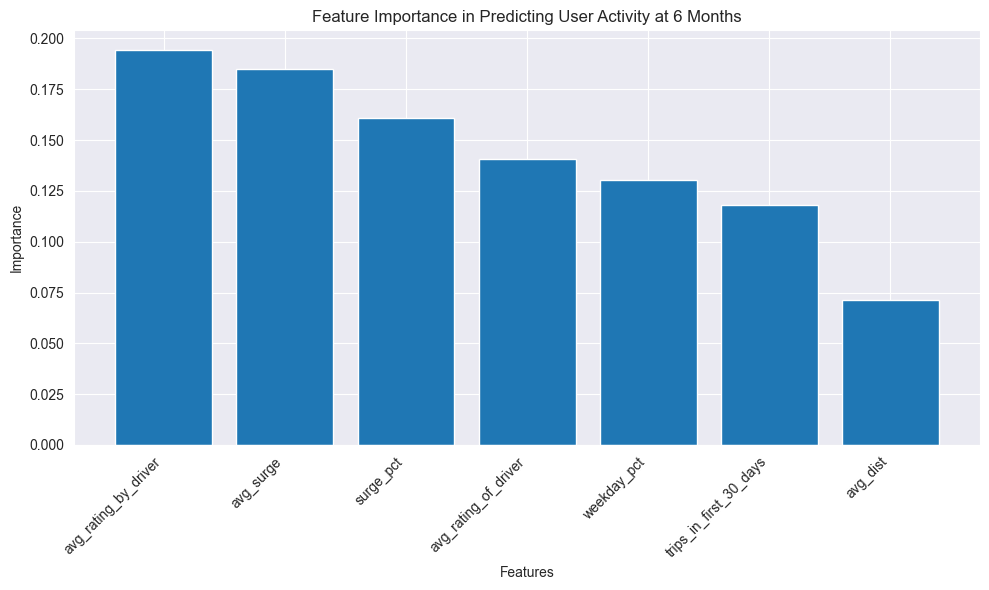

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Create the target variable (active in 6th month)
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['active_6th_month'] = (df['last_trip_date'] - df['signup_date']).dt.days >= 180

# Select features for the model
features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']
X = df[features]
y = df['active_6th_month']

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Apply imputer to the features
X_imputed = imputer.fit_transform(X)

# Split the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Train a Random Forest model with class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance in Predicting User Activity at 6 Months')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The model has high accuracy of 99.55%, indicating it's correctly predicting the vast majority of cases.  The model correctly predicts 9,955 negative cases (users who are not active in the sixth month) and misclassifies 32 negative cases as positive.  The model maintains perfect precision, recall, and F1-score for the negative class but struggles to predict the positive class accurately.  Looking at feature importance, average rating by driver is now the most important feature, accounting for around 19.4% of the predictive power.  Average surge and surge percentage are the next most important features, and average distance which before was the most important feature is now the least important.  The changes in feature importance provide insight for Ultimate's retention strategies, suggesting that driver ratings are surge pricing patterns are key indicators of long-term user engagement.  Ultimate can leverage insights from the model to improve long term rider retention by focusing on driver quality (The high importance of 'avg_rating_by_driver' suggests that positive driver interacts significantly impact long-term retention.  Ultimate should invest in driver traiing and incentive programs to maintain high service quality.  In addition, With 'avg_surge' and 'surge_pct' being important factors, Ultimate can fine-tune its surge pricing strategy to balance revenue and user retention. They might consider loyalty programs or surge discounts for frequent users.  The importance of 'avg_rating_of_driver' indicates that users who give higher ratings are more likely to stay. Ultimate should investigate what drives these positive ratings and replicate those experiences.  The 'weekday_pct' feature's importance suggests focusing on retaining weekday users. Ultimate could develop commuter-specific promotions or features to encourage consistent weekday use.